In [227]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [198]:
bath = pd.read_csv('BathSoapHousehold.csv')

In [105]:
import matplotlib.pyplot as plt

In [254]:
bath = pd.get_dummies(bath)

# The variables that describe both purchase behavior and basis of purchase


In [270]:
bath.head()

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [271]:
bath.isna().sum()

Member id                0
SEC                      0
FEH                      0
MT                       0
SEX                      0
AGE                      0
EDU                      0
HS                       0
CHILD                    0
CS                       0
Affluence Index          0
No. of Brands            0
Brand Runs               0
Total Volume             0
No. of  Trans            0
Value                    0
Trans / Brand Runs       0
Vol/Tran                 0
Avg. Price               0
Pur Vol No Promo - %     0
Pur Vol Promo 6 %        0
Pur Vol Other Promo %    0
Br. Cd. 57, 144          0
Br. Cd. 55               0
Br. Cd. 272              0
Br. Cd. 286              0
Br. Cd. 24               0
Br. Cd. 481              0
Br. Cd. 352              0
Br. Cd. 5                0
Others 999               0
Pr Cat 1                 0
Pr Cat 2                 0
Pr Cat 3                 0
Pr Cat 4                 0
PropCat 5                0
PropCat 6                0
P

In [272]:
bath.shape

(600, 46)

In [273]:
print(list(bath.columns))

['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272', 'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5', 'Others 999', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4', 'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9', 'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14', 'PropCat 15']


In [274]:
# create kmeans objects
kmeans = KMeans(n_clusters = 5)

In [275]:
# fit the kmeans object to the dataset
kmeans.fit(bath)

KMeans(n_clusters=5)

In [276]:
clusters = kmeans.cluster_centers_

In [277]:
clusters

array([[1.05758230e+06, 3.35632184e+00, 2.48275862e+00, 9.13793103e+00,
        1.82758621e+00, 3.00000000e+00, 3.47126437e+00, 4.68965517e+00,
        2.97701149e+00, 9.88505747e-01, 1.29885057e+01, 3.41379310e+00,
        1.45172414e+01, 1.30906322e+04, 3.51264368e+01, 1.37557011e+03,
        2.94609195e+00, 4.08272644e+02, 1.08244828e+01, 9.12674370e-01,
        4.78721230e-02, 3.94535071e-02, 1.34249104e-01, 2.25414988e-01,
        1.59239469e-02, 3.79817524e-02, 2.86594424e-02, 1.30410730e-02,
        2.51847709e-02, 1.89693581e-02, 5.00072026e-01, 2.18604299e-01,
        4.22594498e-01, 2.41554458e-01, 1.17246745e-01, 4.01645259e-01,
        1.28790713e-01, 7.25480560e-02, 3.71482117e-02, 4.04366053e-02,
        1.24158187e-02, 1.86634559e-02, 2.17258983e-03, 3.54052419e-02,
        2.38122434e-01, 1.26516153e-02],
       [1.15371502e+06, 1.65022422e+00, 1.64573991e+00, 6.99551570e+00,
        1.65022422e+00, 3.20627803e+00, 4.72197309e+00, 3.65470852e+00,
        3.34080717e+00,

In [278]:
y_km = kmeans.fit_predict(bath)

In [279]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [280]:
print(kmeans.inertia_)

70236471291.28682


In [281]:
kmeans.labels_.shape

(600,)

In [282]:
cluster_no = range(2,20)
inertia = []
for i in cluster_no:
    kmeans = KMeans(n_clusters = i, random_state=2)
    kmeans = kmeans.fit(bath)
    u = kmeans.inertia_
    inertia.append(u)
    print('inertia of: ', i, 'cluster: ', u)

inertia of:  2 cluster:  311871775894.5114
inertia of:  3 cluster:  154282645040.54153
inertia of:  4 cluster:  83169106029.20763
inertia of:  5 cluster:  70236471291.28682
inertia of:  6 cluster:  59144517687.95931
inertia of:  7 cluster:  51255773691.22163
inertia of:  8 cluster:  46135933087.09803
inertia of:  9 cluster:  40837061559.04029
inertia of:  10 cluster:  35829674893.02745
inertia of:  11 cluster:  31791087412.19639
inertia of:  12 cluster:  29083858363.243927
inertia of:  13 cluster:  27448654666.350307
inertia of:  14 cluster:  25733974297.059135
inertia of:  15 cluster:  24274590583.91109
inertia of:  16 cluster:  22977028435.058037
inertia of:  17 cluster:  21942526362.411507
inertia of:  18 cluster:  20740723393.810497
inertia of:  19 cluster:  19752693072.19412


Text(0.5, 1.0, 'inertia plot per k')

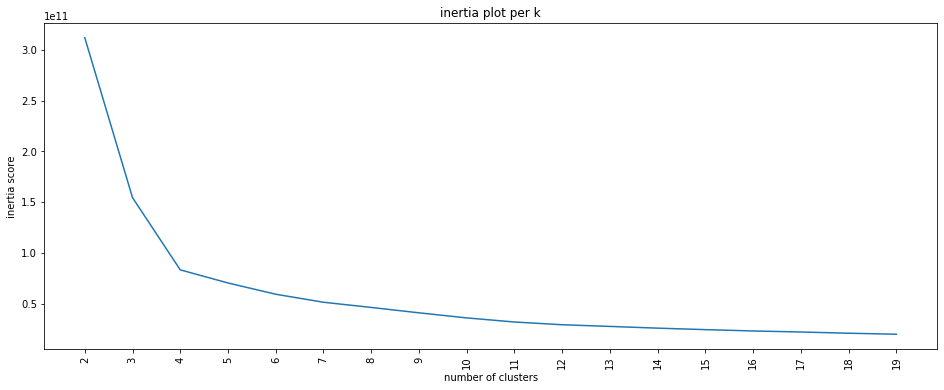

In [283]:
# creating a plot to choose which inertia of cluster should we choose
fig, (ax1) = plt.subplots(1,figsize = (16,6))
xx = np.arange(len(cluster_no))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(cluster_no, rotation='vertical')
plt.xlabel('number of clusters')
plt.ylabel('inertia score')
plt.title('inertia plot per k')

In [284]:
# running kmeans using 5 clusters
kmeans = KMeans(n_clusters = 4, random_state = 2)
kmeans = kmeans.fit(bath)
kmeans.labels_
#prediction
predictions  =kmeans.predict(bath)

# calculating the count of cluster
unique, counts = np.unique(predictions, return_counts = True)
counts =counts.reshape(1,4)

#creating a datagram
countscldf = pd.DataFrame(counts,columns = ['cluster0','cluster1','cluster2','cluster3'])
countscldf

,cluster0,cluster1,cluster2,cluster3
0,128,91,223,158


In [285]:
# checking the kmeans labels 
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [286]:
# checking if the predictions matches the labels 
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [306]:
# setting x variable and y variable and target
x = bath
y = predictions
target_name = ['cluster0','cluster1','cluster2','cluster3']
# setting the pca
pca = PCA(n_components = 2, random_state = 453)
pca_fit = pca.fit(x).transform(x)


In [334]:
#filter rows of original data
filtered_label0 = pca_fit[predictions == 0]

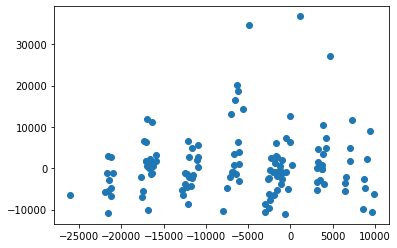

In [337]:
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

In [338]:
#Getting unique labels
u_labels = np.unique(predictions)

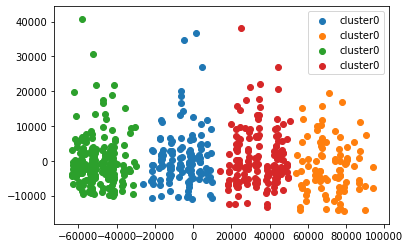

In [343]:
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_fit[predictions == i , 0], pca_fit[predictions == i , 1] , label = target_name)
plt.legend()
plt.show()

#

## running kmeans with variables that describe purchase behavior (including brand loyalty)

In [130]:
bath.columns

Index(['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
       'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
       'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5',
       'Others 999', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
       'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
       'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14',
       'PropCat 15'],
      dtype='object')

In [134]:
bath_pb = bath.iloc[:,:-15]

In [136]:
bath_pb.shape

(600, 31)

In [139]:
bath_pb.columns

Index(['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
       'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
       'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5',
       'Others 999'],
      dtype='object')

In [140]:
# create kmeans objects
kmeans_pb = KMeans(n_clusters = 4)

In [142]:
# fit the kmeans object to the dataset
kmeans_pb.fit(bath_pb)

KMeans(n_clusters=4)

In [144]:
clusters_pb = kmeans_pb.cluster_centers_

In [145]:
clusters_pb

array([[1.11049766e+06, 2.42187500e+00, 2.20312500e+00, 8.84375000e+00,
        1.82031250e+00, 3.17187500e+00, 4.42968750e+00, 4.28906250e+00,
        3.23437500e+00, 1.00000000e+00, 1.83437500e+01, 3.85937500e+00,
        1.70781250e+01, 1.24015234e+04, 3.27890625e+01, 1.44816328e+03,
        2.16625000e+00, 4.24234687e+02, 1.20068750e+01, 9.09250629e-01,
        5.70528972e-02, 3.36964739e-02, 1.87456319e-01, 5.79844167e-02,
        3.54251200e-02, 3.49156395e-02, 1.31404672e-02, 2.41677218e-02,
        4.05031458e-02, 2.29688419e-02, 5.83438328e-01],
       [1.07022797e+06, 3.17088608e+00, 2.43037975e+00, 9.05696203e+00,
        1.84177215e+00, 3.25949367e+00, 3.67721519e+00, 4.74683544e+00,
        3.00000000e+00, 1.01265823e+00, 1.44936709e+01, 3.44303797e+00,
        1.48164557e+01, 1.42074684e+04, 3.49177215e+01, 1.47474905e+03,
        3.31170886e+00, 4.45032468e+02, 1.06525949e+01, 9.18667377e-01,
        4.57567455e-02, 3.55758773e-02, 1.68378458e-01, 2.03297540e-01,
       

In [147]:
print(kmeans_pb.inertia_)

83169105709.69818


In [149]:
print(kmeans_pb.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [150]:
kmeans.labels_.shape

(600,)

In [218]:
cluster_no_pb = range(2,20)
inertia_pb = []
for i in cluster_no_pb:
    kmeans_pb = KMeans(n_clusters = i, random_state=2)
    kmeans_pb = kmeans_pb.fit(bath_pb)
    n = kmeans_pb.inertia_
    inertia_pb.append(n)
    print('inertia of: ', i, 'cluster: ', n)

inertia of:  2 cluster:  311871775568.51526
inertia of:  3 cluster:  154282644713.72864
inertia of:  4 cluster:  83169105709.69818
inertia of:  5 cluster:  70236470972.39346
inertia of:  6 cluster:  59144517369.60925
inertia of:  7 cluster:  51255773373.740326
inertia of:  8 cluster:  46135932770.387505
inertia of:  9 cluster:  40837061242.42534
inertia of:  10 cluster:  35829674576.805084
inertia of:  11 cluster:  31791087096.521645
inertia of:  12 cluster:  29083858048.469578
inertia of:  13 cluster:  27448654352.131107
inertia of:  14 cluster:  25733973983.17571
inertia of:  15 cluster:  24274590270.277073
inertia of:  16 cluster:  22977028122.944565
inertia of:  17 cluster:  21942526050.140312
inertia of:  18 cluster:  20740723085.797886
inertia of:  19 cluster:  19752692759.86632


Text(0.5, 1.0, 'inertia plot per k')

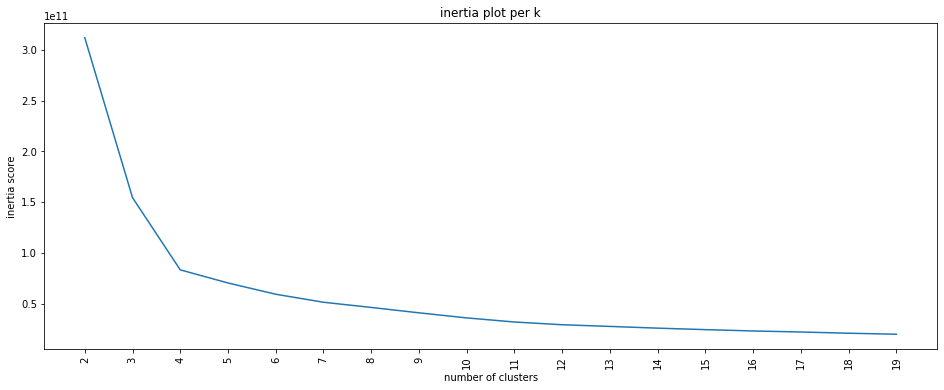

In [219]:
# creating a plot to choose which inertia of cluster should we choose
fig, (ax1) = plt.subplots(1,figsize = (16,6))
xx = np.arange(len(cluster_no_pb))
ax1.plot(xx,inertia_pb)
ax1.set_xticks(xx)
ax1.set_xticklabels(cluster_no_pb, rotation='vertical')
plt.xlabel('number of clusters')
plt.ylabel('inertia score')
plt.title('inertia plot per k')

In [220]:
# running kmeans using 5 clusters
kmeans_pb = KMeans(n_clusters = 4, random_state = 2)
kmeans_pb = kmeans_pb.fit(bath_pb)
kmeans_pb.labels_
#prediction
predictions_pb  =kmeans_pb.predict(bath_pb)

# calculating the count of cluster
unique_pb, counts_pb = np.unique(predictions_pb, return_counts = True)
counts_pb =counts_pb.reshape(1,4)

#creating a datagram
countscldf_pb = pd.DataFrame(counts_pb,columns = ['cluster0','cluster1','cluster2','cluster3'])
countscldf_pb

,cluster0,cluster1,cluster2,cluster3
0,128,91,223,158


In [158]:
kmeans_pb.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [159]:
predictions_pb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [358]:
# setting x variable and y variable and target
x_pb = bath_pb
y_pb = predictions_pb

# setting the pca
pca = PCA(n_components = 2, random_state = 2)
pca_fit_pb = pca.fit(x_pb).transform(x_pb)


In [359]:
#filter rows of original data
filtered_label0_pb = pca_fit_pb[y_pb == 0]

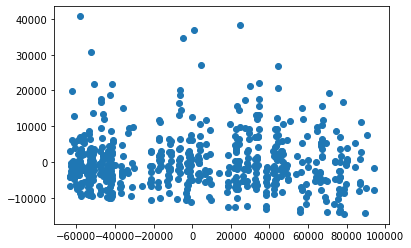

In [360]:
#plotting the results
plt.scatter(pca_fit_pb[:,0] , pca_fit_pb[:,1])
plt.show()

In [361]:
#Getting unique labels
u_labels_pb = np.unique(y_pb)

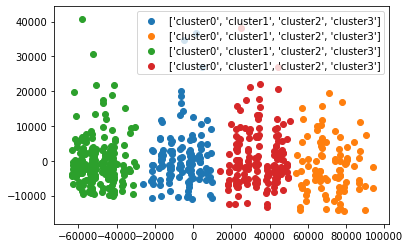

In [362]:
#plotting the results:
 
for i in u_labels_pb:
    plt.scatter(pca_fit_pb[y_pb == i , 0], pca_fit_pb[y_pb == i , 1] , label = target_name)
plt.legend()
plt.show()

# The variables that describe the basis for purchase

In [192]:
bath_basis = pd.read_csv('BathSoapHousehold.csv')

In [196]:
bath_basis.drop(columns =['No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
       'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
       'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5',
       'Others 999'], axis = 1, inplace = True )

In [197]:
bath_basis.shape

(600, 26)

In [256]:
bath

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,2,3,10,2,4,5,5,4,1,...,0.000000,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000
596,1167230,3,3,10,2,3,5,4,4,1,...,0.430693,0.074257,0.148515,0.000000,0.039604,0.000000,0.000000,0.089109,0.000000,0.049505
597,1167340,3,3,17,2,4,4,9,4,1,...,0.127148,0.000000,0.030928,0.000000,0.038660,0.000000,0.000000,0.000000,0.180412,0.000000
598,1167350,2,1,4,2,4,5,2,4,2,...,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027273,0.136364,0.000000


In [199]:
bath_basis.columns

Index(['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence Index', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
       'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
       'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14',
       'PropCat 15'],
      dtype='object')

In [179]:
bath_basis.shape

(600, 26)

In [200]:
# create kmeans objects
kmeans_bath_basis = KMeans(n_clusters = 5)

In [207]:
# fit the kmeans object to the dataset
kmeans_bath_basis.fit(bath_basis)

KMeans(n_clusters=5)

In [208]:
clusters_bath_basis = kmeans_bath_basis.cluster_centers_
clusters_bath_basis

array([[1.11075873e+06, 2.42857143e+00, 2.21428571e+00, 8.90476190e+00,
        1.83333333e+00, 3.17460317e+00, 4.46825397e+00, 4.34126984e+00,
        3.21428571e+00, 1.00793651e+00, 1.85317460e+01, 2.78929622e-01,
        5.59982119e-01, 6.53206759e-02, 9.57675829e-02, 4.85995574e-01,
        1.21879181e-01, 1.12727090e-01, 8.51615429e-02, 3.23068660e-02,
        1.83206958e-02, 3.17203142e-02, 4.95371789e-03, 1.80465512e-02,
        6.12378257e-02, 2.76506415e-02],
       [1.05758230e+06, 3.35632184e+00, 2.48275862e+00, 9.13793103e+00,
        1.82758621e+00, 3.00000000e+00, 3.47126437e+00, 4.68965517e+00,
        2.97701149e+00, 9.88505747e-01, 1.29885057e+01, 2.18604299e-01,
        4.22594498e-01, 2.41554458e-01, 1.17246745e-01, 4.01645259e-01,
        1.28790713e-01, 7.25480560e-02, 3.71482117e-02, 4.04366053e-02,
        1.24158187e-02, 1.86634559e-02, 2.17258983e-03, 3.54052419e-02,
        2.38122434e-01, 1.26516153e-02],
       [1.15371502e+06, 1.65022422e+00, 1.64573991e+00

In [212]:
print(kmeans_bath_basis.inertia_)

36040252328.89965


In [213]:
print(kmeans_bath_basis.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [214]:
kmeans_bath_basis.labels_.shape

(600,)

In [223]:
cluster_no_basis = range(2,20)
inertia_basis = []
for i in cluster_no_basis:
    kmeans_basis = KMeans(n_clusters = i, random_state=2)
    kmeans_basis = kmeans_basis.fit(bath_basis)
    m = kmeans_basis.inertia_
    inertia_basis.append(m)
    print('inertia of: ', i, 'cluster: ', m)

inertia of:  2 cluster:  276753412708.335
inertia of:  3 cluster:  119972152366.60182
inertia of:  4 cluster:  48913723591.95037
inertia of:  5 cluster:  36040252328.89965
inertia of:  6 cluster:  24998890541.80056
inertia of:  7 cluster:  17433228362.426964
inertia of:  8 cluster:  12371526417.984726
inertia of:  9 cluster:  10482798776.606113
inertia of:  10 cluster:  8961033057.840942
inertia of:  11 cluster:  7382245597.611109
inertia of:  12 cluster:  6025634586.237051
inertia of:  13 cluster:  4884986455.27288
inertia of:  14 cluster:  3777859057.9041095
inertia of:  15 cluster:  3174925007.759913
inertia of:  16 cluster:  2731602756.5869365
inertia of:  17 cluster:  2392692471.2514315
inertia of:  18 cluster:  2088267421.8515108
inertia of:  19 cluster:  1852137411.0549767


Text(0.5, 1.0, 'inertia plot per k')

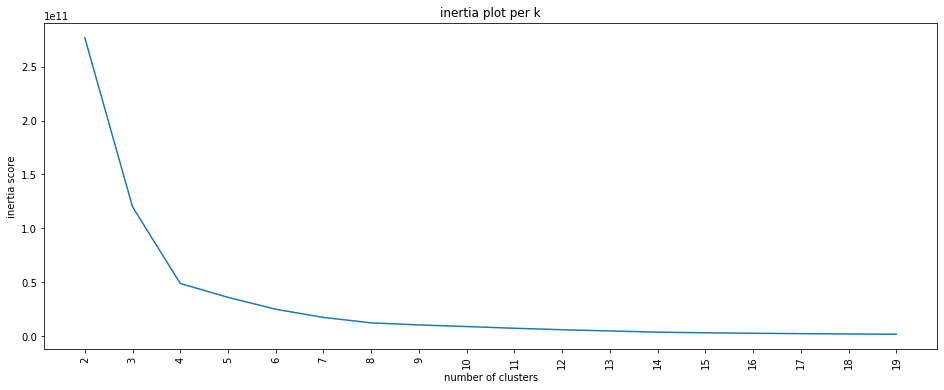

In [224]:
# creating a plot to choose which inertia of cluster should we choose
fig, (ax1) = plt.subplots(1,figsize = (16,6))
xx = np.arange(len(cluster_no_basis))
ax1.plot(xx,inertia_basis)
ax1.set_xticks(xx)
ax1.set_xticklabels(cluster_no_basis, rotation='vertical')
plt.xlabel('number of clusters')
plt.ylabel('inertia score')
plt.title('inertia plot per k')

In [225]:
# running kmeans using 5 clusters
kmeans_basis = KMeans(n_clusters = 4, random_state = 2)
kmeans_basis = kmeans_basis.fit(bath_basis)
kmeans_basis.labels_
#prediction
predictions_basis  =kmeans_basis.predict(bath_basis)

# calculating the count of cluster
unique_basis, counts_basis = np.unique(predictions_basis, return_counts = True)
counts_basis =counts_basis.reshape(1,4)

#creating a datagram
countscldf_basis = pd.DataFrame(counts_basis,columns = ['cluster0','cluster1','cluster2','cluster3'])
countscldf_basis

,cluster0,cluster1,cluster2,cluster3
0,128,91,223,158


In [310]:
kmeans_basis.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [311]:
predictions_basis

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [353]:
# setting x variable and y variable and target
x_basis = bath
y_basis = predictions_basis

# setting the pca
pca = PCA(n_components = 2, random_state = 2)
pca_fit_basis = pca.fit(x_basis).transform(x_basis)


In [354]:
#filter rows of original data
filtered_label0_basis = pca_fit_basis[y_basis == 0]

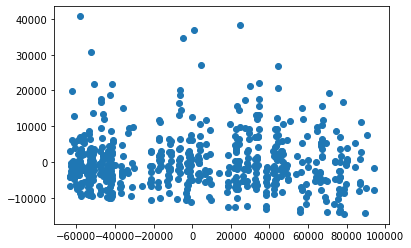

In [355]:
#plotting the results
plt.scatter(pca_fit_basis[:,0] , pca_fit_basis[:,1])
plt.show()

In [356]:
#Getting unique labels
u_labels_basis = np.unique(y_basis)

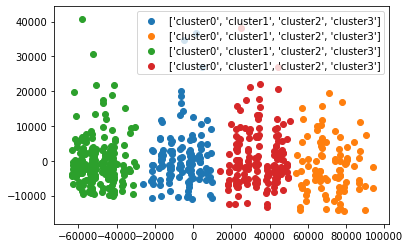

In [357]:
#plotting the results:
 
for i in u_labels_basis:
    plt.scatter(pca_fit_basis[y_basis == i , 0], pca_fit_basis[y_basis == i , 1] , label = target_name)
plt.legend()
plt.show()

In [ ]:
# I would select the segment where the purchase behavoir and the basis of purchase are together because it gives us a deeper
# look insight and better picture of what is the potential customer. 
# i choose for it to be no more than 4 clusters because it doesn't make a big change if we choose more than 4 four cluster 
# as it shows on the curve, the line get flatter if we pass cluster 4
# note: I had some trouble making the plot for the clusters and this is what I managed to get out of